🕵️‍♂️ ステップ1：
道具の準備と現場確認

In [9]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print("--- 訓練データの概要 ---")
print(train['SalePrice'].describe())

--- 訓練データの概要 ---
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


describe() を使うことで、平均価格や最高価格（あの1298番の怪物！）の存在を、数字として改めて「再確認」できます。

🕵️‍♂️ ステップ2：ターゲット（目的変数）の可視化

「推理」の核となった「価格の歪み」を、自分の手でグラフにします。

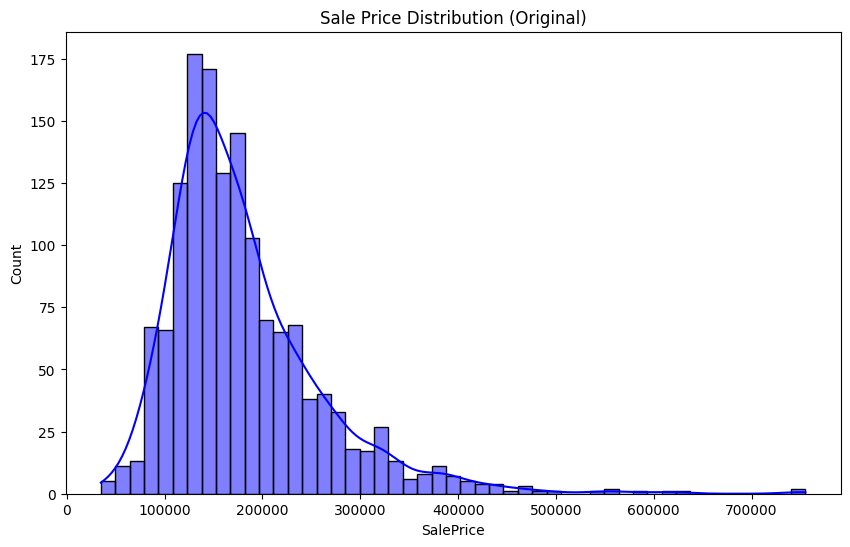

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True, color='blue')
plt.title('Sale Price Distribution (Original)')
plt.show()

この「右に裾が長い」形を見て、「だから対数変換が必要だったんだ！」と昨日の理論をコードで裏付けます。

**データとの再会**

【住宅価格の統計】
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


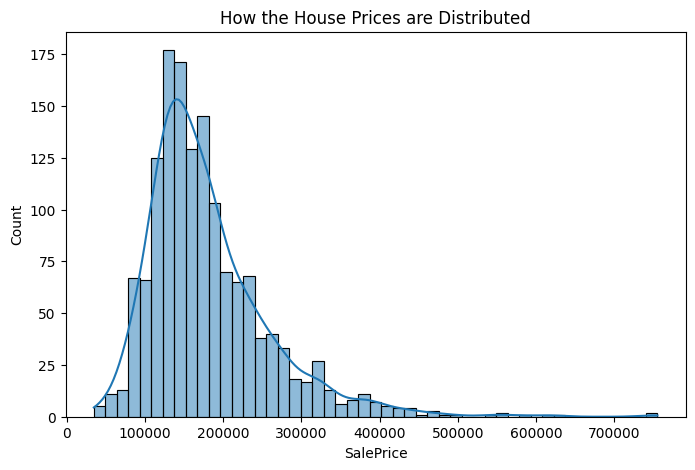

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
print("【住宅価格の統計】")
print(train['SalePrice'].describe())
plt.figure(figsize=(8, 5))
sns.histplot(train['SalePrice'], kde=True)
plt.title('How the House Prices are Distributed')
plt.show()

sns.histplot の中で使った kde=True の KDE は、データの「流れ」を読み解くためのとても便利な道具です。

KDE（Kernel Density Estimation）
日本語では 「**核密度推定（かくみつどすいてい）**」 と呼びます。

一言で言うと、「バラバラの棒グラフを、なめらかな曲線でつないで、データの『勢い（分布）』を見やすくしたもの」 です。




なぜ KDE を使うのか？
「**山」がどこにあるか一瞬でわかる**: 棒グラフ（ヒストグラム）だけだとカクカクして見づらいことがありますが、KDEの曲線があると「このあたりに価格が集中しているな」という山の頂上がはっきりします。

**データの「歪み」がバレる**: 曲線にすることで、左側に山が偏り、右側に裾が長く伸びている（＝高い家が一部だけ存在する）という、エイムズの街の「格差」がより強調されて見えます。

ここからが、1298番の「怪物」を特定したあの分析の再現です。

**広さと価格の「密接な関係」を暴く**

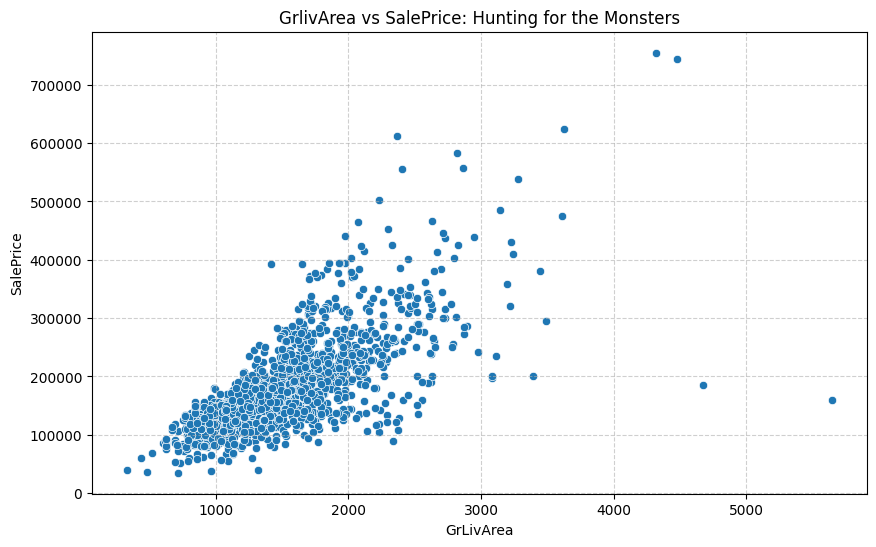

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='GrLivArea', y='SalePrice')
plt.title('GrlivArea vs SalePrice: Hunting for the Monsters')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

sns.scatterplot: 二つのデータの関係（相関）を点（ドット）で表す道具です。

右肩上がりのライン: 広ければ広いほど価格が高い、という「当たり前のルール」を確認します。

右下の「怪物」: このグラフを実行すると、右側の端の方に、**「めちゃくちゃ広いのに、なぜか価格が安い点（1298番たち）」**がポツンと離れて見えます。これが私たちが仕留めるべき敵です。

**3つの重要な言葉**を整理しました。これを知っておくと、コードがただの呪文ではなく、「捜査の指示」に見えてきます。


**1.** kde の相棒： bins **(ビン)**
さっきの sns.histplot で、もし bins=50 のように書くと、棒グラフの**「棒の数」**が変わります。

意味: データをいくつに細かく切り分けるか（ゴミ箱のイメージ）。

推理への影響: bins を大きくしすぎると細かすぎて全体が見えず、小さすぎると大雑把すぎて「怪物の潜伏場所」を見落とします。


**2.** alpha **(アルファ)**
散布図（scatterplot）で alpha=0.5 のように使います。

意味: **「透明度」**のことです。

推理への影響: 1298番のような「怪物」を探すとき、点が重なりすぎて真っ黒になると、どこにデータが密集しているか分かりません。alpha で少し透明にすることで、**「どこに人が多く住んでいて、どこからが異常に高い家なのか」**という「密度の差」が透けて見えるようになります。


**3.** fit **(フィット)**
今後、統計のグラフを出すときに出てくる言葉です。

意味: **「当てはめる」**こと。

推理への影響: バラバラなデータ（証拠）に対して、「理想的な形（正規分布など）」を上から重ねて、どれくらい理想からズレているかを確認する作業です。

<Axes: xlabel='SalePrice', ylabel='Count'>

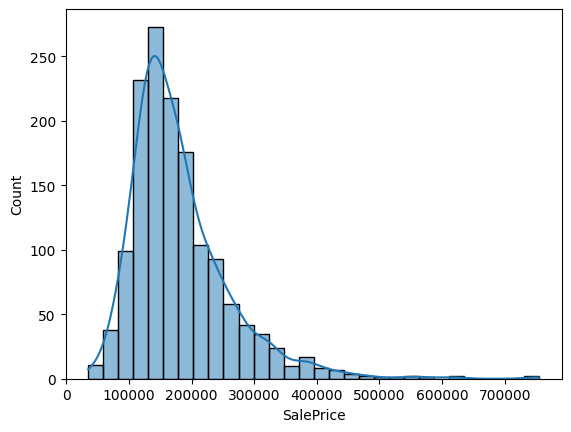

In [13]:
sns.histplot(train['SalePrice'], kde=True, bins=30)

**怪物の潜伏場所を特定する（散布図）**

住宅価格を決める最大の要素「広さ（GrLivArea）」と「価格」の関係をグラフにして、ルールを無視した異常値を視覚的に捕らえます。

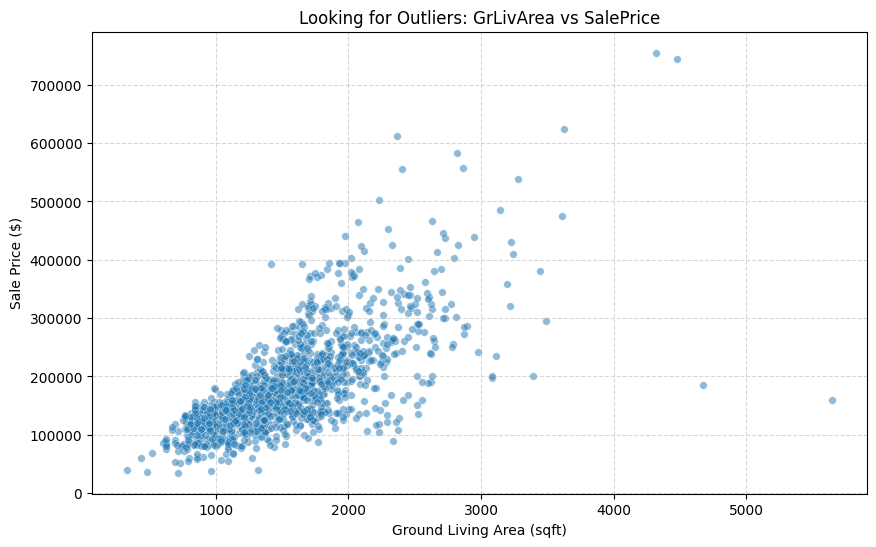

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='GrLivArea', y='SalePrice', alpha=0.5, s=30)

plt.title('Looking for Outliers: GrLivArea vs SalePrice')
plt.xlabel('Ground Living Area (sqft)')
plt.ylabel('Sale Price ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**このグラフから読み取る**

グラフが表示されたら、**右下のエリア**に注目してください。

**普通の家:** 「広くなれば、価格も上がる」という、斜め上に伸びるメインの集団に属しています。

**怪物（外れ値）:** 右下のほうに、「面積はめちゃくちゃ広いのに、なぜか価格が極端に安い」**点が2つ（あるいは3つ）ポツンと離れて存在していませんか？

昨日の分析で、私たちが「こいつらは分析を狂わせる犯人だ！」と断定したのが、まさにこの孤立した点たちです。

**特定と除外の準備**

昨日の捜査で「1298番」と「524番」という犯人の名前（ID）が出てきましたね。それをコードで改めて確認し、なぜ彼らが「怪物」なのかを数字で突き止めます。特定と除外の準備
昨日の捜査で「1298番」と「524番」という犯人の名前（ID）が出てきましたね。それをコードで改めて確認し、なぜ彼らが「怪物」なのかを数字で突き止めます。

In [15]:
outliers = train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)]

print("【特定された外れ値（怪物）の情報】")
print(outliers[['Id', 'GrLivArea', 'SalePrice']])

【特定された外れ値（怪物）の情報】
        Id  GrLivArea  SalePrice
523    524       4676     184750
1298  1299       5642     160000


**外れ値の削除（データ・クリーニング**）
このコードを打てば、データセットは一気に「予測しやすい精鋭部隊」に変わります。

削除後のデータ形: (1458, 81)


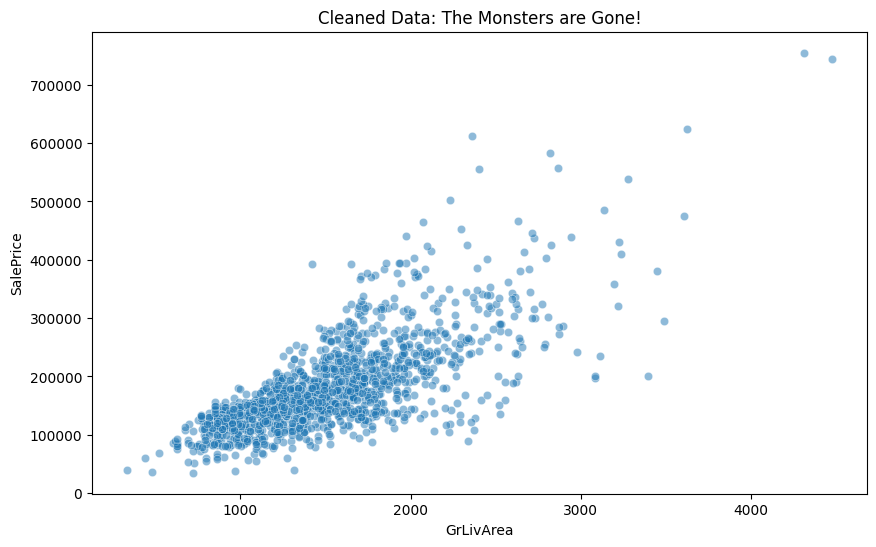

In [16]:
train = train.drop(train.index[[523, 1298]])
print(f"削除後のデータ形: {train.shape}")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='GrLivArea', y='SalePrice', alpha=0.5)
plt.title('Cleaned Data: The Monsters are Gone!')
plt.show()

**価格の「歪み」を直す（対数変換）**

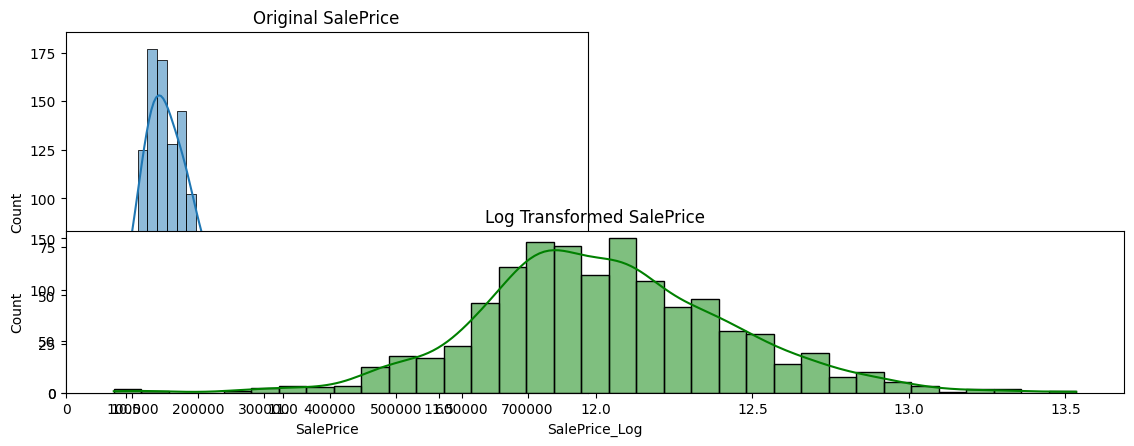

In [17]:
import numpy as np
train['SalePrice_Log'] = np.log1p(train['SalePrice'])
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train['SalePrice'], kde=True)
plt.title('Original SalePrice')
plt.subplot(2, 1, 2)
sns.histplot(train['SalePrice_Log'], kde=True, color='green')
plt.title('Log Transformed SalePrice')
plt.tight_layout()
plt.show()

**Log Transformation（ログ・トランスフォーメーション / 対数変換）**

**意味**: 桁違いに大きい数字をギュッと押し込めて、データの分布を均等にする手法。AI（モデル）は「極端に高い家」があるとパニックになりますが、こうして「普通の山」にしてあげると、格段に予測しやすくなります。

**Normal Distribution（ノーマル・ディストリビューション / 正規分布**）

**意味**: 左右対称な「ベル型」の分布。多くの統計手法や機械学習モデルが、この形を理想としています。

グラフが語っている「捜査の進展」

**散布図（1枚目）**: 右下の「怪物」がいなくなったことで、面積と価格の間に**「綺麗な一本の道（相関）」**が見えるようになりました。これでAIも迷わず学習できます。

**対数変換の比較（2枚目）**:

**上の青（Original）**: 左側にギュッと固まっていて、右側がダラっとしていますよね。これだとAIは「高い家」の予測でミスをしやすくなります。

**下の緑（Log Transformed）**: 見てください、この見事な**「左右対称の山型」**！データが均等に散らばったことで、統計的な扱いやすさが格段に上がりました。

緑の山型になったデータ（SalePrice_Log）の「歪度（Skewness）」が具体的に数字でどれくらい改善されたか、確認する。

緑の山型になったデータ（SalePrice_Log）の「歪度（Skewness）」が具体的に数字でどれくらい改善されたか確認

In [18]:
print(f"変換前の歪度: {train['SalePrice'].skew():.2f}")
print(f"変換後の歪度: {train['SalePrice_Log'].skew():.2f}")

変換前の歪度: 1.88
変換後の歪度: 0.12


1.88 という「かなり左に偏った状態」から、0.12 という「ほぼ理想的な左右対称（0に近いほど完璧）」へと劇的に進化しました。これは捜査で例えるなら、**「ぼやけていた犯人の足跡を、最新の鑑定技術でくっきり浮き彫りにした」

**1.88**: 「一部の超高額物件」が平均を大きく引き上げ、全体を歪ませていた。

**0.12**: データがバランス良く配置され、予測モデル（AI）にとって**「最も学習しやすい形」**になった。